In [8]:
import matplotlib.pyplot as plt
import numpy as np

# FORELÆSNING 5: Signalgrundlag

> EKG-fysiologi, statistik, peak-detektion og grundlæggende signalbehandling med NumPy.

### Underviser: Martin Siemienski Andersen mvan@hst.aau.dk

**ST2 - Anvendt Programmering**

# ST2 ANVENDT PROGRAMMERING – Overblik

## Alle forelæsninger

| # | Forelæsning | Mappe | Primære emner |
|---|------------|-------|----------------|
| 1 | Hej C og Python | oop_1 | Programmeringssprog, grundlæggende syntaks, miljøopsætning |
| 2 | Objekter, indkapsling, interaktion | oop_2 | Klasser, metoder, dataindkapsling, objektinteraktion |
| 3 | Filer og dataindlæsning | oop_3 | Fra tekstfil til objekter |
| 4 | OOP-integration workshop | oop_4_workshop | Integration af OOP, fil-I/O, visualisering; overvågningssystemer til enheder |
| **5** | **Signalgrundlag** | **signals_1** | **EKG-fysiologi, statistik, peak-detektion** |
| 6 | Filtrering og mekaniske signaler | signals_2 | Filtrering, SCG-fysiologi, mekanisk timing, Envelope-udtrækning |
| 7 | Feature engineering, PPG og regression | signals_3 | Feature-definition, PPG-fysiologi, lineær regression, variationsmål |
| 8 | Signalintegration og etik | signals_4_workshop | Multimodal integration, refleksion over signal-workflow, etisk analyse |
| 9 | Lineær regression med populationsdata | populations_data_1 | Lineær regression, modelvalidering, residualer |
| 10 | Datavisualisering og unsupervised læring | populations_data_2 | Datavisualisering, fordelinger, scatter plots, k-means clustering (Iris-datasæt) |
| 11 | Supervised learning: klassifikation | populations_data_3 | k-NN-klassifikation, beslutningsgrænser, modelevaluering |
| 12 | Data-integration workshop | populations_data_4_workshop | End-to-end analyse: regression, clustering, klassifikation, reproducerbarhed, formidling |

# Hvad og Hvorfor?

- EKG
- Etiske Overvejelser
- NumPy
- Signal Analyse Flow
- Statistik
- Støj og filtre (Hvad er støj)
- Feature Extraction

# Etik Mini-Emne: ECG som Følsom Sundhedsdata

## En dag med et ECG

- Forestil dig en patient, der kommer til lægen.
- Lægen sætter elektroder på brystet og tager et ECG.
- Formålet: at tjekke hjerterytmen.

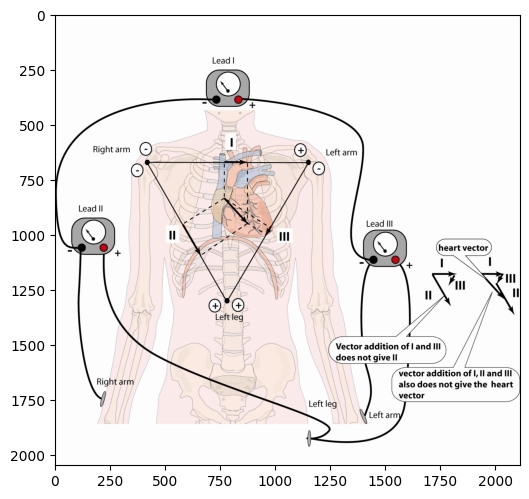

In [9]:
plt.figure(figsize=[6,6])
plt.imshow(plt.imread("files/ekg0.png"))
plt.show()

## Hvad ser vi i ECG-signalet?

- Hjerterytme og puls
- Tydelige mønstre i hjertets elektriske aktivitet
- ECG indeholder mere end blot øjeblikkelig sundhed


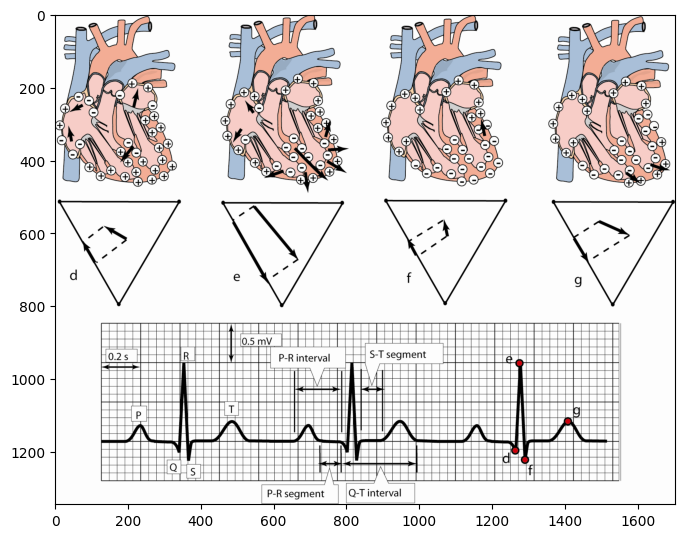

In [10]:
plt.figure(figsize=[8,8])
plt.imshow(plt.imread("files/ekg2.png"))
plt.show()

## Biometrisk identifikation

- ECG-signalet er unikt for hver person
- Kan bruges som en form for "fingeraftryk"
- Risiko: hvis data deles, kan personen identificeres uden samtykke


**Kilde:**
- **GDPR Artikel 9** om behandling af biometriske data: https://eur-lex.europa.eu/eli/reg/2016/679/oj – se Kapitel II, Afsnit 2

## Latente sygdomsmarkører (det patienten ikke selv vidste)

- ECG kan afsløre skjulte sygdomme:
  - Arytmier
  - Risiko for hjerteanfald
- Patient kan være uvidende om disse risici


**Kilde:**
- **Sundhedsloven (Danmark)** Kapitel 4 om patientens ret til information: https://www.retsinformation.dk/eli/lta/2022/1140

## Permanent sundhedshistorik

- ECG-data afspejler hjertets mønstre over tid
- Engang lagret, kan det ikke "tages tilbage"
- Fremtidige risici: forsikring, arbejde, anonymitet

**Kilde:**
- **GDPR Artikel 17** – "Retten til at blive glemt": https://eur-lex.europa.eu/eli/reg/2016/679/oj 
- og **Databeskyttelsesloven**: https://www.retsinformation.dk/eli/lta/2018/502

## Naturlige scenarier

- Hospital: ECG-data bruges til diagnostik
- Wearables: konstant overvågning
- Forskning: deling af store datasæt


## Etiske udfordringer

- Informed consent er vigtigt
- Data-minimering: kun det nødvendige
- Sikker opbevaring og anonymisering
- Ansvarlig deling til forskning eller klinik


**Kilde:**
- **GDPR Artikel 7** om gyldigt samtykke: https://eur-lex.europa.eu/eli/reg/2016/679/oj

## Hvad vi skal tage med os

- ECG-data er ikke bare signaler
- Kan identificere individer
- Kan afsløre skjulte sygdomme
- Repræsenterer permanent sundhedshistorik
- Etik skal styre håndtering



## Diskussion / spørgsmål

- Hvordan håndteres ECG-data i wearables?
- Kan anonymisering altid beskytte patienten?
- Skal ECG bruges til biometrisk autentifikation?


# Hvorfor NumPy?

- Python lister er ueffektive til numeriske beregninger
- NumPy er vektoriserede, og er effektive i hukommelsesbrug
- Der er indbyggede metoder som kan benyttes, så som `mean`, `std` man kan benytte

In [11]:
import numpy as np
py_list = [1, 2, 3, 4, 5]
np_array = np.array(py_list)

temp_sum = 0
for i in range(len(py_list)):
    temp_sum += py_list[i]
manuel_mean = temp_sum / len(py_list)

print("Manual mean 1:", manuel_mean)
print("Manual mean 2:", sum(py_list)/len(py_list))
print("NumPy mean:", np.mean(np_array))

print(py_list+py_list)
print(np_array+np_array)
print(np_array[:3]) # Samme som print(np_array[0:3])
print(np_array[::2]) # Samme som print(np_array[0:5:2]), det er altsaa [start_index,stop_index,step_size]
print(py_list[::2]) # Samme som print(np_array[0:5:2]), det er altsaa [start_index,stop_index,step_size]

Manual mean 1: 3.0
Manual mean 2: 3.0
NumPy mean: 3.0
[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
[ 2  4  6  8 10]
[1 2 3]
[1 3 5]
[1, 3, 5]



# Data Workflow

```mermaid
flowchart LR
    A[*Load Data*] --> B[Inspect]
    B --> C[Clean]
    C --> D[Visualize]
    D --> E[Extract Features]
    E --> F[Store]
```
## Loade data med numpy

- https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt

> ```python
> import numpy as np
> signal1 = np.genfromtxt("filnavn.csv")
> ```

**Men hvorfor?**  
- `np.genfromtext` gør det meget lettere at håndterer flere kolonner
- `np.genfromtext` konverterer til tal automatisk.
- `np.genfromtext` unpack columns!


Der findes også `np.loadtxt(...)`, men jeg foretrækker genfromtext (grundet forskellige årsager, som gør sig gældende i løbet af kurset)

```mermaid
flowchart LR
    A[Load Data] --> B[**Inspect**]
    B --> C[Clean]
    C --> D[Visualize]
    D --> E[Extract Features]
    E --> F[Store]
```
## Inspect

**1 Signal**
>```python
>import matplotlib.pyplot as plt
>plt.plot(signal1)
>plt.show()
>```

**Plotte flere ting, fx 2 signaler**
>```python
>import matplotlib.pyplot as plt
>plt.plot(signal1)
>plt.plot(signal2)
>plt.show()
>```

<div style="background-color: rgba(255, 253, 231, 0.2); padding: 30px; border-radius: 10px; border-left: 5px solid #fbc02d;">

## Exercise: Inspect

Du ved nu:
- Hvad en `csv` fil er
- Hvordan man loader data ind med `numpy`
- Hvordan man visualiserer data med `matplotlib`

Du skal nu:
- Lav et program `inspect_random_signal.py`
- Plotte og inspektserer data fra hhv `files/random_signal1.csv` og `files/random_signal2.csv` i samme plot.
- Fortæl med egne ord, hvad de 2 signaler ligner og hvordan de 2 datasæt er forskellige fra hinanden (Du skal ikke beregne noget, bare se på signalerne)
    - Er der forskel i amplituderne på signalerne? 
    - Er der forskel i støj på singalerne?
    - Hvad ligner signalerne, hvis man (forsøger at) ignorerer støjen?
  

</div>

## Answer

**Plot signalerne**

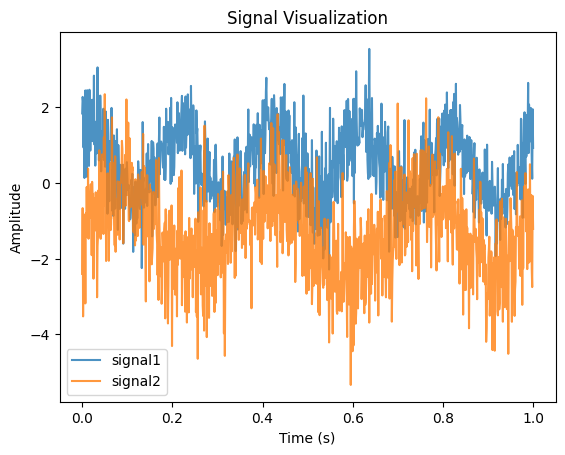

In [12]:
import matplotlib.pyplot as plt
import numpy as np
signal1 = np.genfromtxt("files/random_signal1.csv")
signal2 = np.genfromtxt("files/random_signal2.csv")
dt = 1.0/len(signal1)
Fs = 1/dt
T = np.linspace(0,1,len(signal1))


plt.plot(T,signal1, label="signal1", alpha=0.8)
plt.plot(T,signal2, label="signal2",alpha=0.8)
plt.title("Signal Visualization")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

**Fortæl med egne ord, hvad de 2 signaler ligner og hvordan de 2 datasæt er forskellige fra hinanden**
- Signal 1 har et signal som har højere værdier
- Det kunne godt se ud som om at der er mere støj på Signal 2 end Signal 1.
- Det kunne godt ligne at de to signaler er sinus kurver, med en masse støj.
- Det kunne godt se ud som om at Signal 1 har en mindre periode T, ift. Signal 2, da der er flere høje peaks.

## Inspect: Visualizing Statistics

mean1_val=0.4889014709848078, std1_val=0.9666732803243623


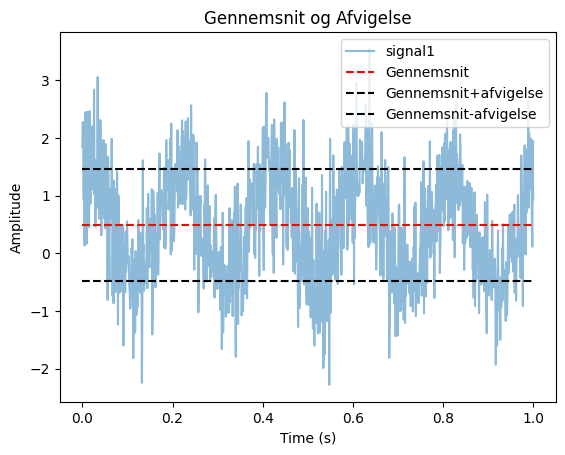

In [13]:
test_signal = signal1
mean1_val = float(np.mean(test_signal))
std1_val = float(np.std(test_signal))

print(f"{mean1_val=}, {std1_val=}")

plt.plot(T, test_signal,label="signal1", alpha=0.5) # alpha betyder gennemsigtighed
plt.plot([0,1],[mean1_val, mean1_val], linestyle="--",color="r", label="Gennemsnit")
plt.plot([0,1],[mean1_val+std1_val, mean1_val+std1_val], linestyle="--",color="k", label="Gennemsnit+afvigelse")
plt.plot([0,1],[mean1_val-std1_val, mean1_val-std1_val], linestyle="--",color="k", label="Gennemsnit-afvigelse")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Gennemsnit og Afvigelse")
plt.show()

## Inspect: General Signal Feature Visualization

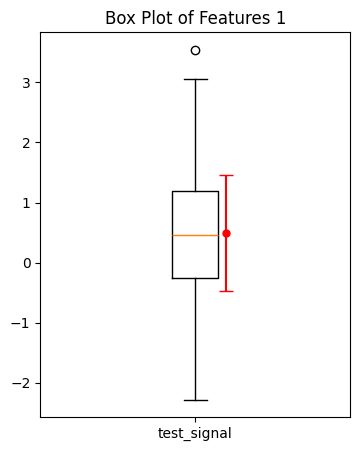

In [ ]:
test_signal = signal1 
mean1_val = float(np.mean(test_signal))
std1_val = float(np.std(test_signal))
plt.figure(figsize=[4,5])
# Bar plot of mean, variance, std
plt.boxplot(test_signal, )
plt.errorbar(1.1, mean1_val, yerr=std1_val, fmt='o', color='red', markersize=5, capsize=5, label='Mean ±1 std')

plt.title("Box Plot of Features 1")
plt.xticks([1], ["test_signal"])
plt.show()

# Data Workflow

```mermaid
flowchart LR
    A[Load Data] --> B[Inspect]
    B --> C[**Clean**]
    C --> D[Visualize]
    D --> E[Extract Features]
    E --> F[Store]
```

## **Clean**: Filter

**Formål**
Et filter bruges til at selektivt ændre målte signaler (Y) eller data ved at fremhæve det vi ønsker (signalet, X), og undertrykke det vi ikke ønsker (noise, N).

$$
y[i] = x[i] + n[i]
$$

**Hovedårsager**
- **Fjern støj**: Reducer uønskede forstyrrelser og bevar nyttig information.
- **Finde relevante features**: Isoler specifikke frekvensbånd, tendenser eller hændelser.
- **Øge forståeligheden**: Gør signaler og data nemmere at analysere og visualisere.
- **Opfyld systemkrav**: Forhindre aliasing, stabilisere kontrolsystemer eller matche sensorens båndbredde.
- **Bedre ydeevne**: Øg nøjagtigheden i detektion, estimering og beslutningstagning.

**Almindelige eksempler**
- Lavpasfilter: fjern højfrekvent støj  
- Højpasfilter: fjern langsom drift eller baseline  
- Båndpasfilter: isoler et specifikt frekvensområde

**Konklusion**
> Filtre hjælper os med at fokusere på **det, der er vigtigt**, i nærvær af **det, der ikke er**.

## Moving Average Filter
Beregn gennemsnit for N-elementer-slice (window) i et array. 

* **Udglatter data**: Reducerer kortsigtet støj og fremhæver overordnede tendenser.
* **Glidende gennemsnit**: Hvert punkt er gennemsnittet af omkringliggende værdier inden for et valgt vindue.
* **Enkel og alsidig**: Kan bruges på signaler, tidsserier eller sekventielle data for at afsløre underliggende mønstre.

>```text
>FUNCTION moving_average_filter(data, window):
>    FOR each index `i` in data:
>        take the points within the window, centered at i
>        calculate their average
>        set smoothed_data[i] = average
>    RETURN smoothed_data
>```

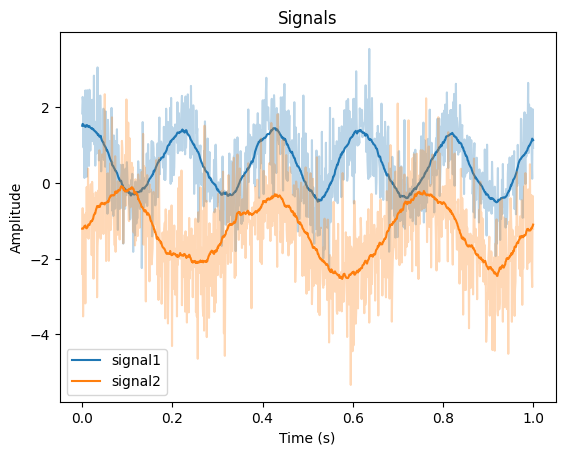

In [21]:
def moving_average_filter(data: np.ndarray, window: int):
    N = len(data)
    smoothed = np.zeros_like(data)
    halfwindow = window//2
    for i in range(N):
        start = max(0, i - halfwindow)
        end = min(N, i + halfwindow + 1)
        smoothed[i] = data[start:end].mean()

    return smoothed

window_size  = 50
smoothed_signal1 = moving_average_filter(signal1,window_size)
smoothed_signal2 = moving_average_filter(signal2,window_size)

plt.plot(T,signal1, color="C0", alpha=0.3)
plt.plot(T,smoothed_signal1, color="C0", label="signal1")
plt.plot(T,signal2, color="C1", alpha=0.3)
plt.plot(T,smoothed_signal2, color="C1", label="signal2")
plt.legend()
plt.title("Signals")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.show()

## Variability Metrics

*   R-peak: Highest point in QRS complex
*   RR interval: Time between consecutive R-peaks
*   Variability metrics: Mean RR, SDNN, RMSSD

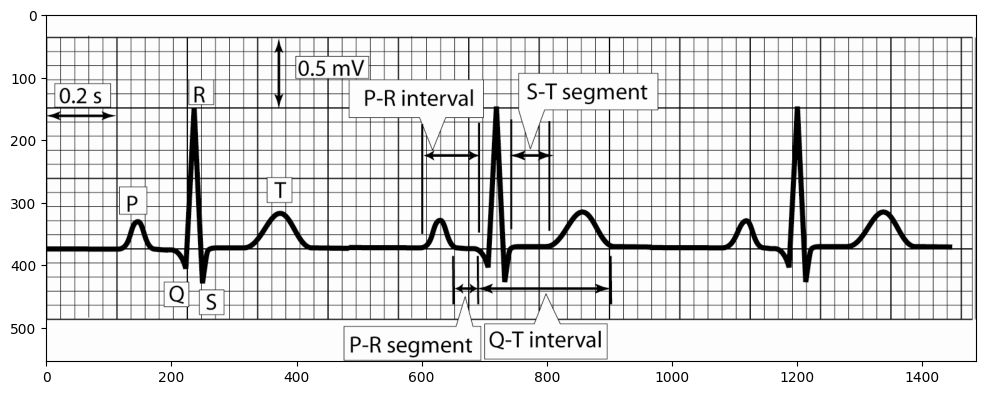

In [ ]:
plt.figure(figsize=[12,12])
plt.imshow(plt.imread("files/ekg1.png"))
plt.show()

* **R-peak** = the highest point of the QRS complex
* **RR interval** = time between consecutive R-peaks

### **Peak Detector:**
*Finder kun positionen af peaks*
```python
def peak_detector(data, thr):
    value_record = 0
    time_record = 0
    indecies = []
    for i, value in enumerate(data):
        if value > thr:
            if value > value_record:
                value_record = value
                time_record = i
        else:
            if value_record:
                indecies.append(time_record)
                time_record = 0
                value_record = 0

    return indecies
```

### **SDNN (Standard Deviation of NN intervals)**

* **What it is:**
  The standard deviation of all **NN (normal-to-normal) RR intervals** in the recording.
* **What it measures:**
  Overall heart rate variability (`HRV`), reflecting both short-term and long-term variability.
* **How it’s computed:**
  If ($RR_1, RR_2, \dots, RR_N$) are NN intervals:
$$
  \text{SDNN} = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (RR_i - \overline{RR})^2}
$$
* **Typical units:** milliseconds (ms)

### **RMSSD (Root Mean Square of Successive Differences)**

* **What it is:**
  The root mean square of differences between **successive NN intervals**.
* **What it measures:**
  Short-term HRV, strongly influenced by parasympathetic (vagal) activity.
* **How it’s computed:**
  $$
  \text{RMSSD} = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N-1} (RR_{i+1} - RR_i)^2}
  $$
* **Typical units:** milliseconds (ms)

  

### **In short**
* **SDNN** → overall variability across the whole recording
* **RMSSD** → beat-to-beat (short-term) variability

# Exercises


<div style="background-color: rgba(255, 253, 231, 0.2); padding: 30px; border-radius: 10px; border-left: 5px solid #fbc02d;">

## Exercise: Analyze EKG

**Du ved:**
- Hvordan man arbejder med data som er gemt i en fil
- Hvordan man viser data
- Hvordan man finder R-peaks (OOP 3)
- Hvordan man arbejder med arrays

**Du skal benytte den nævnte viden til at:**
1. Lav et program `analyze_ekg.py`
2. loade data fra filen `files/ECG_300Hz.csv`, som er optaget med 300Hz, og visualiserer dataen i et passende plot, hvor tid (sekunder) er på x-axen.
   - *Hint: Hvis du har problemer med antallet af kolonner, så overvej om du har læst dokumentationen for [np.genfromtxt](https://numpy.org/doc/2.3/reference/generated/numpy.genfromtxt.html)?*
3. Vis RR feature fra signalet på figuren
   - *Hint: kan du ændre: `marker` og `linestyle` i [plt.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)? Eller måske bruge [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) ?*
4. Print hvor mange millisekunder der er mellem hver R peak
</div>

<div style="background-color: rgba(200, 240, 200, 0.3); padding: 20px; border-radius: 10px; border-left: 5px solid #66bb6a;">

## Answer
</div>


RR times: [0.86666667 0.85      ]


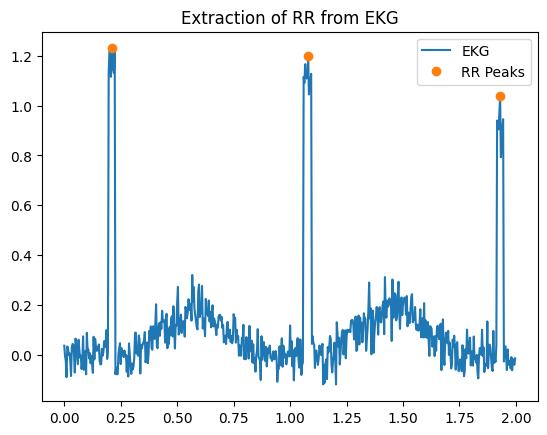

In [42]:
import numpy as np
import matplotlib.pyplot as plt
filename = "files/ECG_300Hz.csv"
tid,ekg = np.genfromtxt(filename, unpack=True, skip_header=1,autostrip=True, delimiter=",", dtype=float)

tid = tid/300
def peak_detector(data:list[float], thr:float):
    value_record = 0
    time_record = 0
    indecies:list[float] = []
    for i, value in enumerate(data):
        if value > thr:
            if value > value_record:
                value_record = value
                time_record = i
        else:
            if value_record:
                indecies.append(time_record)
                time_record = 0
                value_record = 0

    return indecies

R_indecies = peak_detector(ekg,0.6)

print("RR times:", np.diff(tid[R_indecies]))


plt.plot(tid,ekg, label="EKG")
plt.plot(tid[R_indecies],ekg[R_indecies], marker="o", linestyle="", label="RR Peaks")
plt.legend()
plt.title("Extraction of RR from EKG")

plt.show()



<div style="background-color: rgba(255, 253, 231, 0.2); padding: 30px; border-radius: 10px; border-left: 5px solid #fbc02d;">

## Exercise: Analyser Noisy EKG

**Du ved:**
- Hvordan man filtrerer et signal
- Hvordan man finder R-peaks
- Hvordan man finder features i et signal

**Du skal benytte den nævnte viden til at:**
1. Lav et program `analyze_noisy_ekg.py`
2. loade data fra filen `files/ECG_noisy.csv`, som er optaget med 300Hz, og visualiserer den filtreret ekg i et passende plot, hvor tid (sekunder) er på x-axen.
3. Hvad er sample-frekvensen for signalet?
4. Extraherer features fra signalet:`Mean`, `SDNN`, `RMSSD`, for RR og R-peaks-amplituden og visualiserer dem med et barplot i en ny figure

</div>

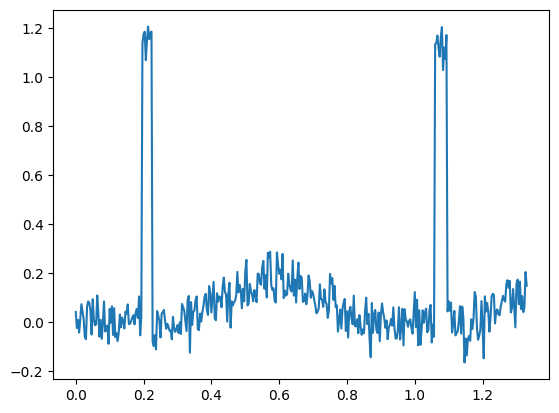

In [17]:
time,ekg = np.genfromtxt("files/ECG_noisy.csv", unpack=True , delimiter=",")
N = 400
plt.plot(time[:N],ekg[:N])
plt.show()

<div style="background-color: rgba(200, 240, 200, 0.3); padding: 20px; border-radius: 10px; border-left: 5px solid #66bb6a;">

## Answer
</div>


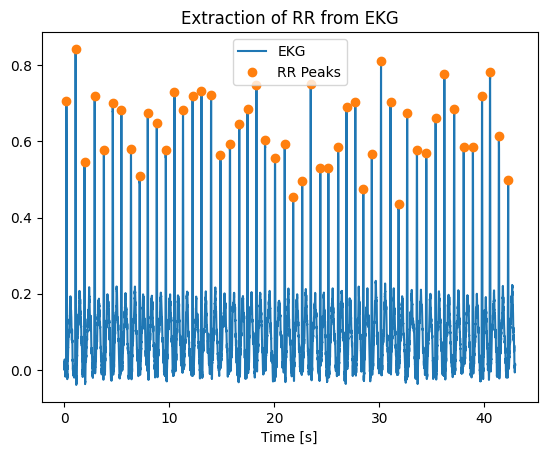

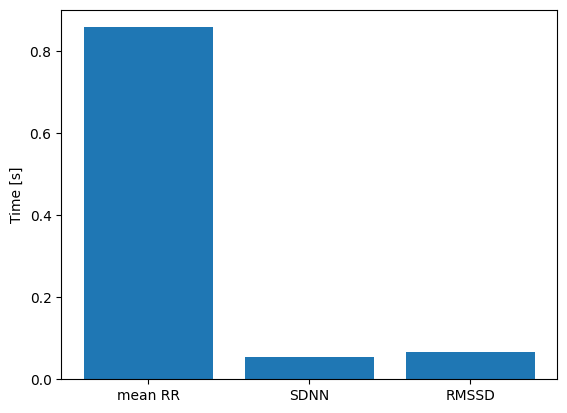

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average_filter(data: np.ndarray, window: int):
    N = len(data)
    smoothed = np.zeros_like(data)
    halfwindow = window//2
    for i in range(N):
        start = max(0, i - halfwindow)
        end = min(N, i + halfwindow + 1)
        smoothed[i] = data[start:end].mean()

    return smoothed

def peak_detector(data:list[float], thr:float):
    value_record = 0
    time_record = 0
    indecies:list[float] = []
    for i, value in enumerate(data):
        if value > thr:
            if value > value_record:
                value_record = value
                time_record = i
        else:
            if value_record:
                indecies.append(time_record)
                time_record = 0
                value_record = 0

    return indecies


time,data = np.genfromtxt("files/ECG_noisy.csv", unpack=True , delimiter=",")
ekg = moving_average_filter(data,15) 
R_indecies = peak_detector(ekg,0.4)

RR =  np.diff(time[R_indecies])

mean_RR = RR.mean()
sdnn = RR.std()
rmssd = np.sqrt(np.diff(RR)**2).sum()/(len(RR)-2)
plt.plot(time,ekg, label="EKG")
plt.plot(time[R_indecies],ekg[R_indecies], marker="o", linestyle="", label="RR Peaks")
plt.legend()
plt.title("Extraction of RR from EKG")
plt.xlabel("Time [s]")
plt.show()


plt.bar(["mean RR", "SDNN", "RMSSD"], [mean_RR, sdnn, rmssd])
plt.ylabel("Time [s]")
plt.show()


<div style="background-color: rgba(255, 253, 231, 0.2); padding: 30px; border-radius: 10px; border-left: 5px solid #fbc02d;">

## Exercise: Udtræk EKG cyklus

**Du ved:**
- Hvordan man finder peaks i et signal
- Hvordan man bruger et filter
- Hvordan man laver en class

**Du skal nu:**
1. Lav et program `extract_heartcycle.py`, der indeholder en class `HeartCycleExtractor`, som kan returnerer et array som indeholder en specifik hjertecyklus fra en metode `get_cycle(n)`
    - `n` er den n'te hjertecyklus.
    - En hjertecyklus starter 0.1s før n'te Rpeak til 0.1s før (n+1)'te Rpeak.
    - Den returnerede hjertecyklus skal være filtreret med et passende moving average filter.
2. Du skal lave et class diagram og flow diagram som forklare hver metoderne: `get_cycle`, `filter_signal`.
    - Du kan bruge hjemmesiden: https://draw.io eller http://mermaid.live

</div>

<div style="background-color: rgba(200, 240, 200, 0.3); padding: 20px; border-radius: 10px; border-left: 5px solid #66bb6a;">

## Answer
</div>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
